<a href="https://colab.research.google.com/github/NitinVerma2027/PRML-Apr2025/blob/main/ml_ipynb_files/knn_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Downloading...
From (original): https://drive.google.com/uc?id=1gj1rEzLDzNBpRswfqZaJxCFs5EwQSA87
From (redirected): https://drive.google.com/uc?id=1gj1rEzLDzNBpRswfqZaJxCFs5EwQSA87&confirm=t&uuid=2a6d8a0e-96c0-4681-b499-08239cfd248e
To: /content/train_dataset.csv
100%|██████████| 110M/110M [00:00<00:00, 125MB/s]
Downloading...
From: https://drive.google.com/uc?id=1MX9ckuU6rhL3PaVvflrXsZ-0m2bFeWsy
To: /content/test_dataset.csv
100%|██████████| 18.3M/18.3M [00:00<00:00, 65.9MB/s]


Training Data Shape: (60000, 784)
Testing Data Shape: (10000, 784)


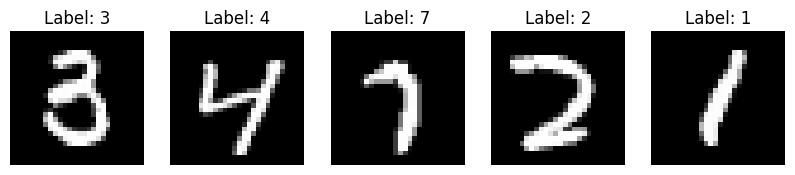

Predicting: 100%|██████████| 200/200 [00:03<00:00, 54.36it/s]


k=1, Accuracy=85.00%


Predicting: 100%|██████████| 200/200 [00:03<00:00, 65.09it/s]


k=3, Accuracy=85.50%


Predicting: 100%|██████████| 200/200 [00:02<00:00, 81.67it/s]


k=5, Accuracy=87.50%


Predicting: 100%|██████████| 200/200 [00:02<00:00, 78.06it/s]


k=7, Accuracy=85.50%


Predicting: 100%|██████████| 200/200 [00:02<00:00, 82.87it/s]


k=9, Accuracy=86.50%

Best k found: 5


Predicting Probabilities: 100%|██████████| 10000/10000 [09:36<00:00, 17.35it/s]



Final Accuracy: 93.54%


Predicting: 100%|██████████| 200/200 [00:03<00:00, 62.65it/s]


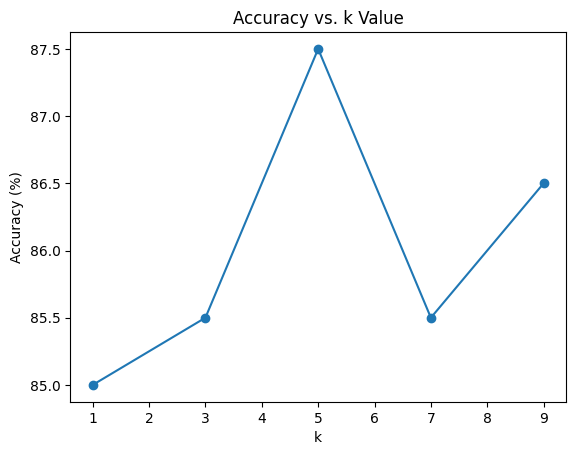

In [5]:
import numpy as np
import gdown
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, accuracy_score
import random

# Download dataset
train_file_id = "1gj1rEzLDzNBpRswfqZaJxCFs5EwQSA87"
test_file_id = "1MX9ckuU6rhL3PaVvflrXsZ-0m2bFeWsy"

train_url = f"https://drive.google.com/uc?id={train_file_id}"
test_url = f"https://drive.google.com/uc?id={test_file_id}"

train_output = "train_dataset.csv"
test_output = "test_dataset.csv"

gdown.download(train_url, train_output, quiet=False)
gdown.download(test_url, test_output, quiet=False)

# Load Data
train_df = pd.read_csv(train_output, header=None)
test_df = pd.read_csv(test_output, header=None)

# Extract Features & Labels
y_train = train_df.iloc[:, 0].values  # Labels
X_train = train_df.iloc[:, 1:].values / 255.0  # Normalize Features

y_test = test_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values / 255.0

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")

# Display Sample Images (with random selection)
num_samples = 5  # Number of samples to display
sample_indices = random.sample(range(len(X_train)), num_samples)  # Get random indices

fig, axes = plt.subplots(1, num_samples, figsize=(10, 3))
for i, ax in enumerate(axes):
    index = sample_indices[i]  # Get the random index
    ax.imshow(X_train[index].reshape(28, 28), cmap="gray")
    ax.set_title(f"Label: {y_train[index]}")
    ax.axis("off")
plt.show()

# Euclidean Distance Function
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# KNN Classifier (Manual)
class KNN:
    def __init__(self, k=3):  # Corrected the initializer method name
        self.k = k

    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):
        predictions = [self._predict(x) for x in tqdm(X_test, desc="Predicting")]
        return np.array(predictions)

    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[: self.k]
        k_labels = [self.y_train[i] for i in k_indices]

        # Manual Majority Voting
        label_count = {}
        for label in k_labels:
            label_count[label] = label_count.get(label, 0) + 1
        return max(label_count, key=label_count.get)

    def predict_proba(self, X_test):  # Predicting probabilities for ROC curve
        probabilities = [self._predict_proba(x) for x in tqdm(X_test, desc="Predicting Probabilities")]
        return np.array(probabilities)

    def _predict_proba(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[: self.k]
        k_labels = [self.y_train[i] for i in k_indices]

        # Calculate probabilities for each class
        probs = np.zeros(10)  # Assuming 10 classes (0-9)
        for label in k_labels:
            probs[label] += 1
        return probs / self.k


# Find Best k Value
best_k = 1
best_acc = 0

for k in range(1, 11, 2):  # Test odd values of k
    knn = KNN(k=k)
    knn.fit(X_train[:1000], y_train[:1000])  # Use subset for faster training
    y_pred = knn.predict(X_test[:200])  # Small subset for quick testing
    acc = np.sum(y_pred == y_test[:200]) / len(y_test[:200]) * 100
    print(f"k={k}, Accuracy={acc:.2f}%")

    if acc > best_acc:
        best_acc = acc
        best_k = k

# Train with Best k
print(f"\nBest k found: {best_k}")
knn = KNN(k=best_k)
knn.fit(X_train[:5000], y_train[:5000])  # Use a larger subset for better accuracy
y_pred = knn.predict(X_test) # Predict on the entire test dataset to fix the ValueError
y_prob = knn.predict_proba(X_test)  # Get probabilities for ROC curve


# Final Accuracy
final_acc = np.sum(y_pred == y_test) / len(y_test) * 100
print(f"\nFinal Accuracy: {final_acc:.2f}%")

# Accuracy Graph
k_values = range(1, 11, 2)
accuracies = []
for k in k_values:
    knn = KNN(k=k)
    knn.fit(X_train[:1000], y_train[:1000])
    y_pred_subset = knn.predict(X_test[:200]) # Using a subset for the accuracy graph
    acc = accuracy_score(y_test[:200], y_pred_subset) * 100
    accuracies.append(acc)

plt.plot(k_values, accuracies, marker='o')
plt.title('Accuracy vs. k Value')
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
plt.show()


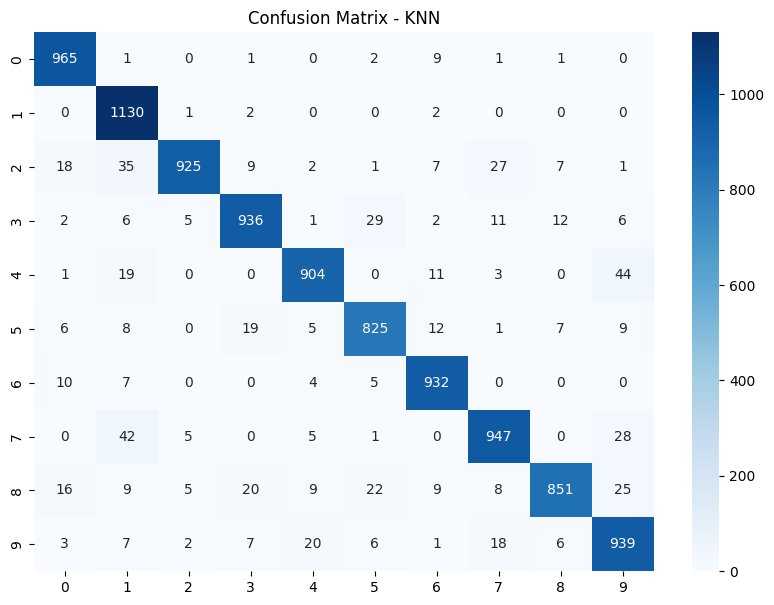

In [6]:
# Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(np.array(pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.show()


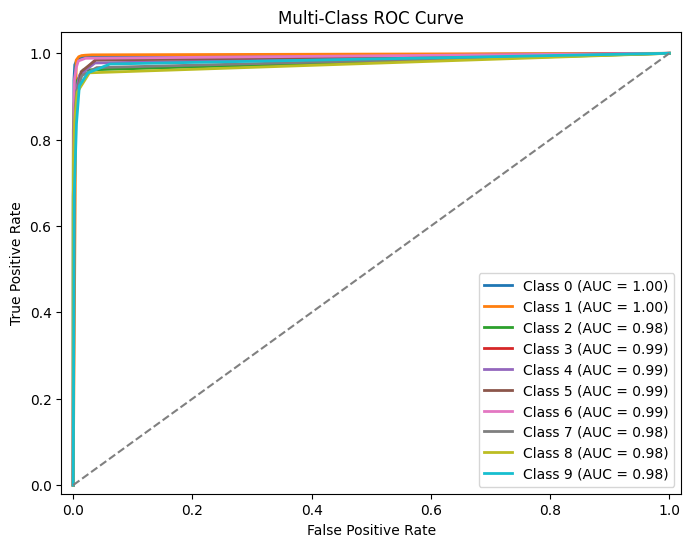

In [7]:
# ROC Curve
# Assuming y_train, y_test, y_prob are defined
n_classes = len(np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Adjust x and y limits to give more space around axes
plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')

plt.show()



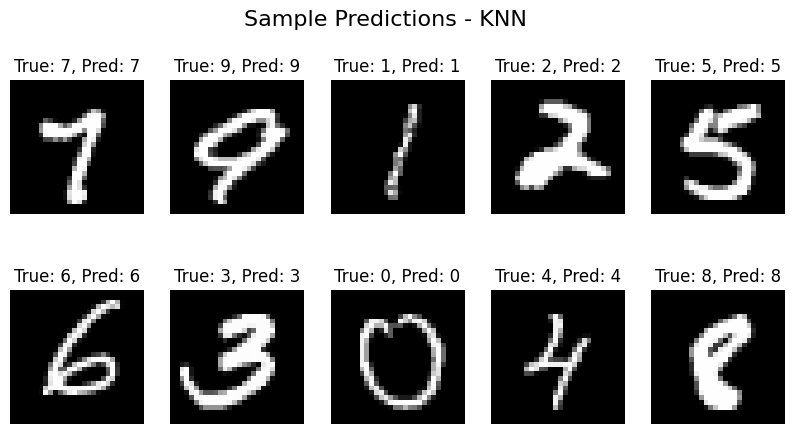

In [8]:
#  Ensure diverse digits
digits = np.arange(10)
indices = [np.random.choice(np.where(y_test == d)[0]) for d in digits if np.any(y_test == d)]
indices = np.random.choice(indices, 10, replace=False)  # Pick 10 random diverse samples

# Plot Sample Predictions
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
fig.suptitle("Sample Predictions - KNN", fontsize=16)

for i, ax in zip(indices, axes.flat):
    ax.imshow(X_test[i].reshape(28, 28), cmap="gray")
    ax.set_title(f"True: {y_test[i]}, Pred: {y_pred[i]}")
    ax.axis("off")

plt.show()
